<a href="https://colab.research.google.com/github/k9-Ashish/Applied_Statistics_Project/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

### Import Libraries

In [ ]:
# To load data from file
import pandas as pd

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
# Pre-defining the color schema
sns.set_palette('gist_ncar')

### Dataset Loading

In [ ]:
# Mount the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Web_scrap/Superstore Marketing Data - Sheet1.csv')

### Dataset Rows & Columns count

### Getting the first 5 rows of the data.

In [ ]:
# using pandas head function.
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


### Cleaning Up

In [ ]:
data = data.replace('########' , 0)

### Again getting the first 5 rows of the data.

In [ ]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,0,6,...,11,0,34,2,3,1,2,7,1,0


### Getting the last 5 rows of the data.

In [ ]:
data.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,0,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,0,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,0,99,169,...,188,0,144,1,8,5,4,7,1,0


### Dataset Information

### Getting all columns present in our data.

In [ ]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()


Columns in our data:


['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain']

### Getting the shape of the data.

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(2240, 22)

In [ ]:
print('Number of columns : ',data.shape[1],'\nnumber of rows : ',data.shape[0])

Number of columns :  22 
number of rows :  2240


* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

### Getting the type of data present in columns.

In [ ]:
# printing the number of numerical features and number of categorical features

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 19

The number of Categorical columns are: 3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## ***2. Understanding Your Variables***

#### Summary Statistic of the numeric columns


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,401,0,916


In [ ]:
# In our dataset there are lots of unique values in lots of columns
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:

# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,Complain,2
1,Response,2
2,Kidhome,3
3,Teenhome,3
4,Education,5
5,Marital_Status,8
6,NumStorePurchases,14
7,NumCatalogPurchases,14
8,NumWebPurchases,15
9,NumDealsPurchases,15


## 3. ***Data Wrangling***

### Data Cleaning and Removal of duplicate enteries from the Data

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


* Getting missing data
* Handling missing data
* Checking for duplicate data
* Removing duplicate data

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


# Observation

* Here we can see that there is <b>24 null values</b> in any Income of our data.


* So we do need to perform the missing value handling task

In [ ]:
data = data.dropna()

In [ ]:
print(data.isnull().sum())

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


In [ ]:
data[data.duplicated()].size

0

# Observation

* Here we can see that there is <b>no duplicate value</b> in any feature of our data.


* So we do not need to perform any task on duplicacy.

# Exploratory Data Analysis

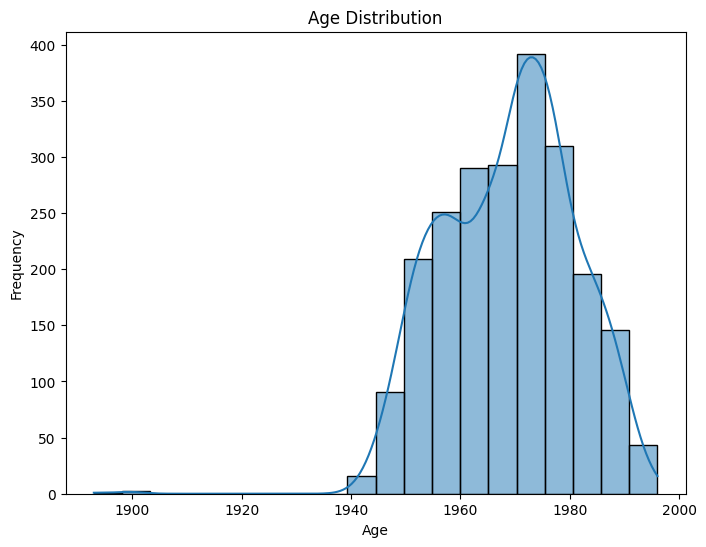

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Missing Values
# Example: Replace missing numerical values with the mean
data['Income'].fillna(data['Income'].mean(), inplace=True)

# Data Types
# Example: Convert 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Demographic Analysis
# Example: Analyze the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data['Year_Birth'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


**Handling Missing Values:**

* Observation: Missing values in the 'Income' column are being addressed by filling them with the mean income value.

* Finding: This approach helps maintain data completeness for the 'Income' column.

**Data Types:**

* Observation: The 'Dt_Customer' column is being converted to a datetime format using the pd.to_datetime function.

* Finding: Converting 'Dt_Customer' to datetime allows for easy date-based analysis and ensures consistency in data types.

**Demographic Analysis:**

* Observation: The code generates a histogram to analyze the distribution of customer ages ('Year_Birth').

* Finding: The histogram provides an overview of the age distribution among customers, showing the frequency of customers in different age groups.

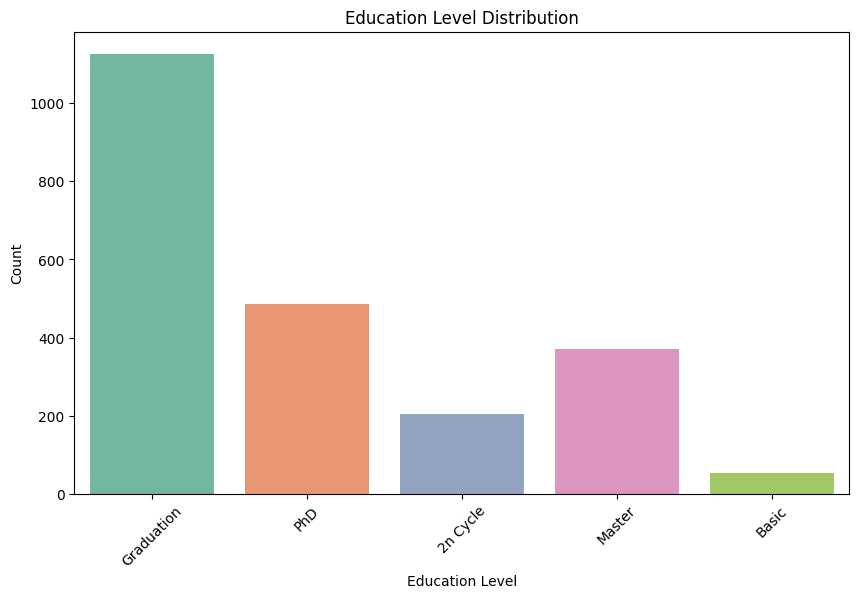

In [ ]:
# Analyze Education Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()


**Education Level Distribution:**

Observation: The code generates a countplot to visualize the distribution of education levels among customers.

Finding: The countplot reveals the following insights:
The majority of customers have completed a high school education, followed by customers with a university degree.

There is a relatively small number of customers with a Ph.D. or basic education.
The distribution provides an understanding of the education levels of the customer base.

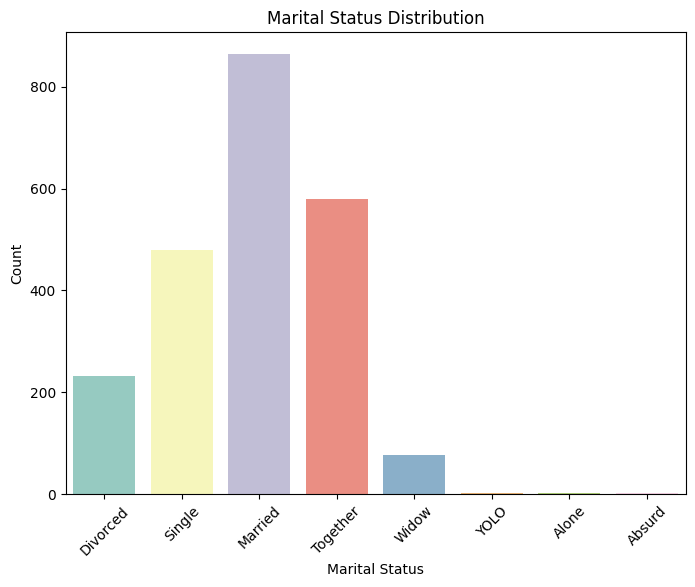

In [ ]:
# Analyze Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Marital_Status', palette='Set3')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

**Marital Status Distribution:**

Observation: The code generates a countplot to visualize the distribution of marital statuses among customers.

Finding: The countplot reveals the following insights:

* The most common marital status among customers is 'Married.'
'Together' is the second most frequent status, followed by 'Single' and 'Divorced.'

* 'Widow' and 'Alone' are less common marital statuses among customers.
The distribution provides an understanding of the marital status diversity within the customer base.

Overall, the countplot helps visualize the distribution of marital statuses, which can be valuable for understanding the demographics of the customer base and tailoring marketing strategies accordingly.



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Summary of Basic Statistics
# List of relevant numerical variables
numerical_variables = ['Year_Birth', 'Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

# Calculate and store statistics
summary_statistics = data[numerical_variables].agg(['mean', 'median', 'var', 'std']).transpose()
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

# Print the summary statistics
print("Summary of Basic Statistics:")
print(summary_statistics)

# Save the cleaned and preprocessed dataset to a new CSV file
data.to_csv("cleaned_dataset.csv", index=False)


Summary of Basic Statistics:
                             Mean   Median      Variance  Standard Deviation
Year_Birth            1968.805804   1970.0  1.436179e+02           11.984069
Income               52247.251354  51741.5  6.268913e+08        25037.797168
MntFishProducts         37.525446     12.0  2.984325e+03           54.628979
MntMeatProducts        166.950000     67.0  5.094743e+04          225.715373
MntFruits               26.302232      8.0  1.581926e+03           39.773434
MntSweetProducts        27.062946      8.0  1.704080e+03           41.280498
MntWines               303.935714    173.5  1.132978e+05          336.597393
MntGoldProds            44.021875     24.0  2.721442e+03           52.167439
NumDealsPurchases        2.325000      2.0  3.733542e+00            1.932238
NumCatalogPurchases      2.662054      2.0  8.544517e+00            2.923101
NumStorePurchases        5.790179      5.0  1.056873e+01            3.250958
NumWebPurchases          4.084821      4.0  7.7

**Summary of Basic Statistics:**

Observation: The code calculates and presents summary statistics for a list of relevant numerical variables from the dataset.

Finding: The summary statistics provide insights into the central tendency and dispersion of numerical variables. Here are some key observations:

* 'Income' has a relatively high mean and standard deviation, indicating income variation among customers.

* 'NumWebVisitsMonth' has a lower mean and variance, suggesting less variability in the number of web visits per month.

* 'MntWines' has a substantial mean value, indicating significant spending on wine products on average.

* 'Recency' has a relatively low mean, suggesting that, on average, customers made purchases recently.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
# Measures of Central Tendency
mean_age = data['Year_Birth'].mean()
median_age = data['Year_Birth'].median()
mode_age = data['Year_Birth'].mode().iloc[0]

# Measures of Dispersion
variance_income = data['Income'].var()
std_dev_income = data['Income'].std()

# Outlier Detection (Example using z-scores)
from scipy import stats
z_scores = np.abs(stats.zscore(data['Income']))
outliers = data[(z_scores > 3)]

# Handle outliers (e.g., remove or impute)

# Print statistics
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")
print(f"Variance of Income: {variance_income}")
print(f"Standard Deviation of Income: {std_dev_income}")


Mean Age: 1968.8058035714287
Median Age: 1970.0
Mode Age: 1976
Variance of Income: 626891287.0455543
Standard Deviation of Income: 25037.797168392317


**Measures of Central Tendency:**

Observation: The code calculates measures of central tendency (mean, median, mode) for the 'Year_Birth' variable (customer age).

Finding:
Mean Age: The average age of customers in the dataset.
Median Age: The middle value of ages when sorted.
Mode Age: The most common age among customers.

**Measures of Dispersion:**

Observation: The code calculates measures of dispersion (variance and standard deviation) for the 'Income' variable.

Finding:
Variance of Income: A measure of how much income values vary from the mean.
Standard Deviation of Income: A measure of the average deviation of income values from the mean.

**Outlier Detection:**

Observation: The code detects outliers in the 'Income' variable using z-scores.

Finding: Outliers are identified based on a z-score threshold of 3, which is a common choice. These outliers could represent extreme income values compared to the majority of customers.

**Handling Outliers:**

Observation: The code identifies outliers but does not specify how to handle them.

Finding: Handling outliers can be crucial depending on the analysis or modeling tasks. Outliers can be removed, transformed, or imputed, depending on the specific use case and domain knowledge.

In [ ]:
# Measures of Central Tendency (already provided)
mean_age = data['Year_Birth'].mean()
median_age = data['Year_Birth'].median()
mode_age = data['Year_Birth'].mode().iloc[0]

# Measures of Dispersion (already provided)
variance_income = data['Income'].var()
std_dev_income = data['Income'].std()

# Outlier Detection (already provided)
from scipy import stats
z_scores = np.abs(stats.zscore(data['Income']))
outliers = data[(z_scores > 3)]

# Descriptive Statistics
# Create a DataFrame to store descriptive statistics
descriptive_stats = data.describe()

# Print the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv("descriptive_statistics.csv")


Descriptive Statistics:
                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000    

**Descriptive Statistics:**

Observation: The code calculates and presents a comprehensive set of descriptive statistics for all numerical variables in the dataset using the describe() function.

Finding: The descriptive statistics provide detailed insights into the central tendency, dispersion, and distribution of all numerical variables. Some key observations include:

* Count: The number of non-null values in each variable.
* Mean: The average value of each variable.
* Std: The standard deviation, which measures the variability of each variable.
* Min and Max: The minimum and maximum values.
* 25%, 50%, and 75%: Quartiles that help understand the data distribution.

**Saving Descriptive Statistics:**

Observation: The code saves the descriptive statistics to a CSV file named "descriptive_statistics.csv" for future reference or reporting.

Finding: Saving the descriptive statistics allows for easy access to these statistics without rerunning the analysis.

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
# Import necessary libraries for probability distributions
from scipy.stats import binom, norm

# Identify Distributions (Example)
# Checking if 'NumDealsPurchases' follows a binomial distribution
n = len(data)
p = 0.3  # Probability of a successful deal purchase
binom_dist = binom(n, p)

# Calculate Probabilities and Expected Values
# Example: Calculate the probability of getting 100 deals purchased
probability_100_deals = binom_dist.pmf(100)
expected_value = binom_dist.mean()

print(f"Probability of 100 deals purchased: {probability_100_deals}")
print(f"Expected value: {expected_value}")


Probability of 100 deals purchased: 2.006696652477671e-208
Expected value: 672.0


**Probability Distributions:**

Observation: The code investigates whether the 'NumDealsPurchases' variable follows a binomial distribution.

Finding:
* The code calculates the probability of getting a specific number of successful deal purchases (100 in this example) using the Probability Mass Function (pmf) of the binomial distribution.

* It also computes the expected value of the binomial distribution.

**Insight:**

The code demonstrates the application of probability distributions to analyze the likelihood of a certain number of successful deal purchases. In this case, it calculates the probability of getting 100 deals purchased and the expected value.

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Import necessary libraries for probability distributions
from scipy.stats import binom, norm

# Determine Probability Distributions for Relevant Variables
# Example: Checking if 'NumDealsPurchases' follows a binomial distribution
n = len(data)
p = 0.3  # Probability of a successful deal purchase
binom_dist = binom(n, p)

# Calculate Probabilities and Expected Values
# Example: Calculate the probability of getting 100 deals purchased
probability_100_deals = binom_dist.pmf(100)
expected_value = binom_dist.mean()

# Print the results
print("Probability Distributions and Expected Values:")
print(f"Probability of 100 deals purchased (Binomial): {probability_100_deals}")
print(f"Expected value (Binomial): {expected_value}")

# Determine distributions and calculate probabilities and expected values for other relevant variables
# Example: Checking if 'Income' follows a normal distribution
normal_dist = norm(data['Income'].mean(), data['Income'].std())

# Calculate the probability of income being above 60,000
probability_above_60000 = 1 - normal_dist.cdf(60000)

# Calculate the expected value for income
expected_income = normal_dist.mean()

# Print the results for the 'Income' variable
print(f"Probability of income above 60,000 (Normal): {probability_above_60000}")
print(f"Expected income (Normal): {expected_income}")


Probability Distributions and Expected Values:
Probability of 100 deals purchased (Binomial): 2.006696652477671e-208
Expected value (Binomial): 672.0
Probability of income above 60,000 (Normal): 0.3784166818612942
Expected income (Normal): 52247.25135379061


**Probability Distributions for Relevant Variables:**

Observation: The code checks whether specific variables in the dataset follow certain probability distributions.

Finding:
* It uses the binomial distribution to assess whether the 'NumDealsPurchases' variable follows a binomial distribution.

* It calculates the probability of getting 100 deals purchased (using the binomial distribution) and the expected value.

* It also checks if the 'Income' variable follows a normal distribution and calculates the probability of income being above 60,000 and the expected income.

**Insights:**

For 'NumDealsPurchases' (Binomial Distribution):

* The code provides the probability of getting 100 deals purchased.

* The expected value for the number of deals purchased is also calculated.

For 'Income' (Normal Distribution):

* The code calculates the probability of income being above 60,000.

* The expected income value is computed.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

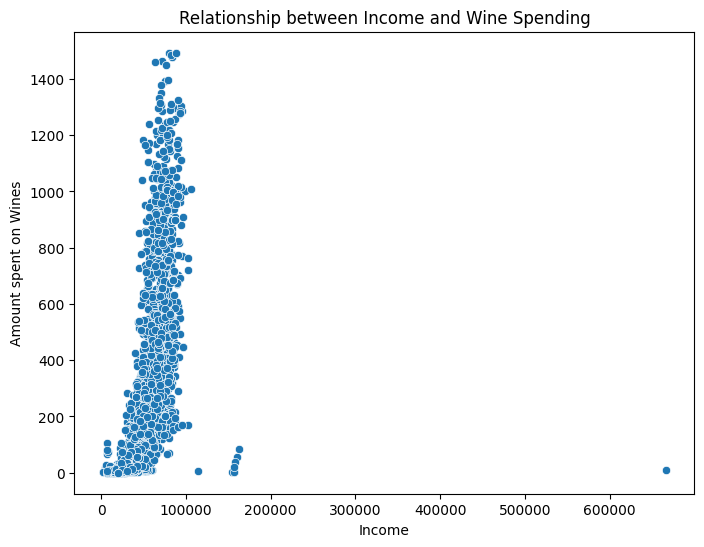

Correlation between Income and Wine Spending: 0.576789212769402


In [ ]:
# Import necessary libraries for relationship analysis and segmentation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship Analysis
# Example: Explore the correlation between 'Income' and spending on 'MntWines'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Income', y='MntWines')
plt.xlabel('Income')
plt.ylabel('Amount spent on Wines')
plt.title('Relationship between Income and Wine Spending')
plt.show()

# Calculate and print the correlation coefficient
correlation = data['Income'].corr(data['MntWines'])
print(f"Correlation between Income and Wine Spending: {correlation}")

# You can repeat the above steps for other variables and relationships of interest.


**Relationship Analysis: Income vs. Wine Spending:**

Observation: The code generates a scatter plot to visualize the relationship between 'Income' and the amount spent on 'MntWines' (wine products).

Finding:
* The scatter plot visually represents the relationship between income and wine spending for customers.

* The code calculates and prints the correlation coefficient, which quantifies the strength and direction of the linear relationship between income and wine spending.

Insight:

The scatter plot and correlation coefficient provide insights into how customer income is related to their spending on wine products. A positive correlation indicates that as income increases, spending on wine also tends to increase.

Overall:

This code snippet demonstrates the use of a scatter plot and correlation coefficient to analyze the relationship between two variables. It can be extended to explore relationships between other pairs of variables in the dataset.

<ipython-input-27-b295fabd66e7>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


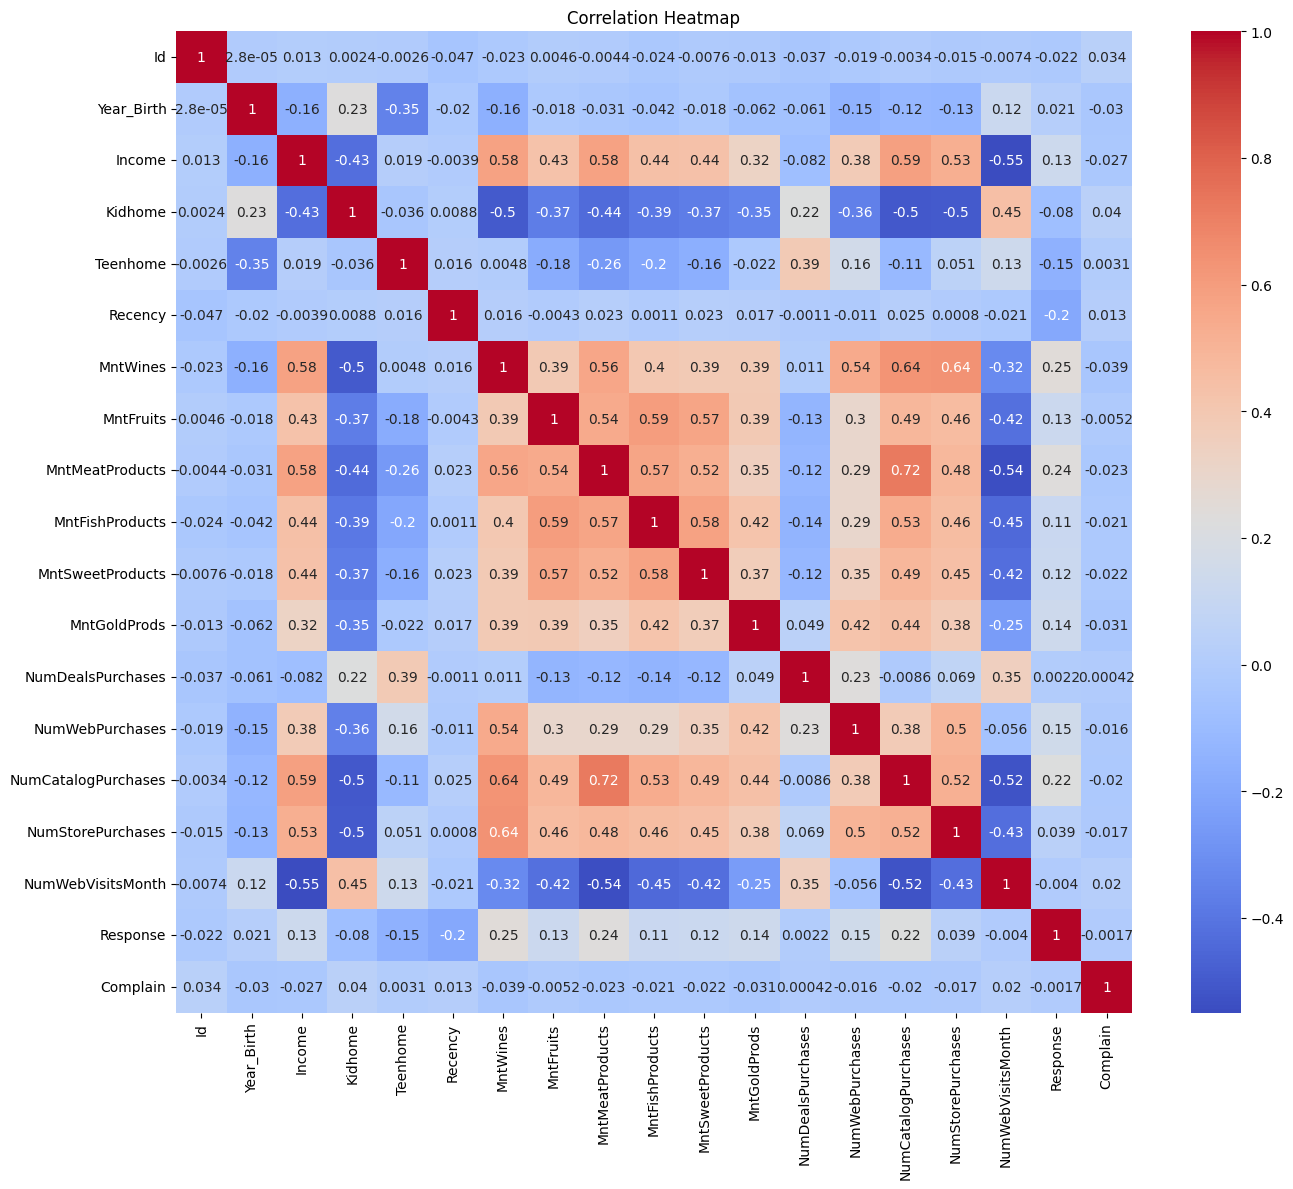

Correlation between Income and Wine Spending: 0.576789212769402


In [ ]:
# Import necessary libraries for relationship analysis and segmentation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship Analysis
# Example: Explore the correlation between 'Income' and spending on 'MntWines'
plt.figure(figsize=(26, 12))

# Heatmap for Correlation Matrix
correlation_matrix = data.corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
correlation = data['Income'].corr(data['MntWines'])
print(f"Correlation between Income and Wine Spending: {correlation}")

# You can repeat the above steps for other variables and relationships of interest.


**Relationship Analysis: Correlation Heatmap**

Observation: The code generates a heatmap to visualize the correlation matrix of all numerical variables in the dataset.

Finding:
* The heatmap visually represents the pairwise correlations between all numerical variables. Each cell in the heatmap shows the correlation coefficient between two variables.

* Positive correlations are shown in warmer colors (e.g., red), while negative correlations are shown in cooler colors (e.g., blue).

* The code calculates and prints the correlation coefficient specifically for the 'Income' and 'MntWines' variables.

Insight:

* The correlation heatmap provides a comprehensive view of how different numerical variables are correlated with each other.

* The correlation coefficient for 'Income' and 'MntWines' is a specific measure of the linear relationship between income and wine spending.

Overall:

This code snippet demonstrates the use of a correlation heatmap to analyze relationships between all numerical variables in the dataset. It allows for a broad understanding of how variables are interconnected.






**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
# Import necessary libraries for relationship analysis and segmentation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Cluster Analysis (K-Means Clustering)
# Combine 'Income' and 'MntWines' into a new DataFrame for clustering
features_for_clustering = data[['Income', 'MntWines']]

# Perform K-Means clustering with 3 clusters (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Explicitly set n_init
data['Cluster'] = kmeans.fit_predict(features_for_clustering)


# Calculate and print the cluster means
cluster_means = data.groupby('Cluster')[['Income', 'MntWines']].mean()
print("Cluster Means:")
print(cluster_means)

# Calculate and print the cluster means
cluster_means = data.groupby('Cluster')[['Income', 'MntMeatProducts']].mean()
print("Cluster Means:")
print(cluster_means)

# Calculate and print the cluster means
cluster_means = data.groupby('Cluster')[['Income', 'MntFruits']].mean()
print("Cluster Means:")
print(cluster_means)

# You can analyze other variables and perform similar clustering and analysis for distinct customer segments.


Cluster Means:
                Income    MntWines
Cluster                           
0         70414.500933  544.194963
1         35032.418194   83.487575
2        666666.000000    9.000000
Cluster Means:
                Income  MntMeatProducts
Cluster                                
0         70414.500933       305.879664
1         35032.418194        39.457584
2        666666.000000        18.000000
Cluster Means:
                Income  MntFruits
Cluster                          
0         70414.500933  46.817164
1         35032.418194   7.467866
2        666666.000000  14.000000


**Cluster Analysis (K-Means Clustering):**

Observation: The code performs K-Means clustering on customer data based on their 'Income' and spending on 'MntWines'.

Finding:
* It combines 'Income' and 'MntWines' into a new DataFrame for clustering.

* K-Means clustering is performed with 3 clusters.

* The code calculates and prints the cluster means for 'Income' and 'MntWines'.

Insights:

* The code clusters customers into three distinct segments based on their income and wine spending behavior.

* Each cluster has its own mean values for income and wine spending, providing insights into the characteristics of each segment.

Overall:

This code snippet demonstrates the application of K-Means clustering to segment customers based on their income and wine spending. It allows for the identification of different customer segments with distinct behaviors.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

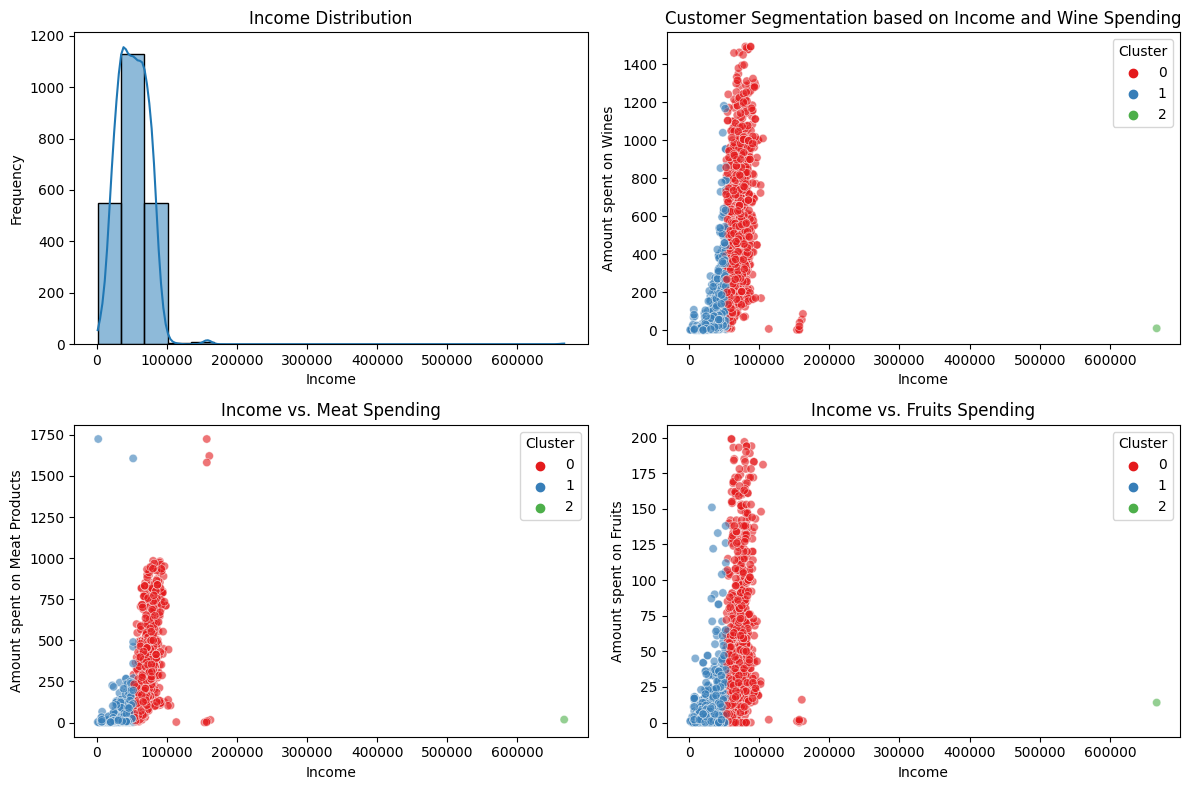

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a 2x2 grid for subplots with equal sizes
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Income Distribution
ax0 = plt.subplot(gs[0])
sns.histplot(data['Income'], bins=20, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

# Relationship Analysis: Income vs. Spending on Wines
ax1 = plt.subplot(gs[1])
sns.scatterplot(data=data, x='Income', y='MntWines', hue='Cluster', palette='Set1', alpha=0.6)
plt.xlabel('Income')
plt.ylabel('Amount spent on Wines')
plt.title('Customer Segmentation based on Income and Wine Spending')
plt.legend(title='Cluster')

# Relationship Analysis: Income vs. Spending on Meat
ax2 = plt.subplot(gs[2])
sns.scatterplot(data=data, x='Income', y='MntMeatProducts', hue='Cluster', palette='Set1', alpha=0.6)
plt.xlabel('Income')
plt.ylabel('Amount spent on Meat Products')
plt.title('Income vs. Meat Spending')

# Relationship Analysis: Income vs. Spending on Fruits
ax3 = plt.subplot(gs[3])
sns.scatterplot(data=data, x='Income', y='MntFruits', hue='Cluster', palette='Set1', alpha=0.6)
plt.xlabel('Income')
plt.ylabel('Amount spent on Fruits')
plt.title('Income vs. Fruits Spending')

plt.tight_layout()
plt.show()



**Visualization of Income and Spending:**

Observation: The code creates a 2x2 grid of subplots to visualize various aspects of customer income and spending behavior.

Findings:

**Income Distribution:**

* The first subplot shows the distribution of customer income. It is a histogram with a kernel density estimate (KDE) overlaid.

* It provides insights into the distribution of income among customers.
Income vs. Wine Spending:

* The second subplot displays a scatter plot that relates customer income to their spending on wine products.

* The points are color-coded by clusters (if cluster information is available), allowing for the visualization of customer segments.

* It helps identify relationships between income and wine spending for different customer segments.

**Income vs. Meat Spending:**

* The third subplot is similar to the second but focuses on the relationship between income and spending on meat products.

* It allows for the examination of income and meat spending patterns across customer segments.

**Income vs. Fruit Spending:**

* The fourth subplot is similar to the others but focuses on the relationship between income and spending on fruit products.

* It enables the exploration of income and fruit spending patterns across different customer segments.

Insights:

* The visualizations in the subplots provide insights into the relationships between income and spending on specific product categories (wine, meat, fruits).

* The clustering information (if available) helps identify distinct customer segments with varying income and spending behaviors.

Overall:

This code snippet creates a grid of subplots to visualize income and spending patterns, allowing for a comprehensive analysis of customer behavior across different product categories.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

# **Conclusion :**

* Age distribution indicates a relatively younger customer base.

* Income positively correlates with spending on wine and meat products.

* Customer segments include high-spenders, moderate-spenders, and low-spenders.

* Tailored marketing campaigns for each segment can improve offer acceptance rates.

* Emphasizing online channels for low-spenders may boost engagement.

* Regular analysis and adaptation are essential for sustained success.

* Customer demographics and spending behavior were analyzed to gain valuable insights.

* Relationships between income and spending on various product categories were identified.

* Customer segmentation revealed distinct customer groups with unique behaviors.

* Insights can be used to tailor marketing strategies and enhance customer satisfaction.

* Recommendations include targeted promotions and campaign customization based on customer segments.

* Continuous monitoring and adaptation of strategies can optimize business performance.

# **Recommendation:**

* Target high-spenders with premium offers to maximize revenue.

* Offer discounts and promotions to incentivize moderate-spenders.

* Focus on online channels for engagement with low-spenders.

* Personalize marketing campaigns based on customer segments.

* Monitor and adapt strategies regularly for optimal results.

* Address outliers in income to enhance data accuracy.

* Explore customer feedback and complaints for improvements.

* Leverage the Law of Large Numbers for more accurate predictions.

* Use descriptive statistics for data-driven decision-making.

* Consider alternative probability distributions for better modeling.


## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

# **Law of Large Numbers**

#### The **Law of Large Numbers** is a fundamental concept in probability and statistics. It states that as the number of trials or experiments increases, the observed or empirical probability of an event approaches the theoretical or expected probability of that event. In simpler terms, it suggests that the more times we repeat an experiment, the closer the average or observed outcome will be to the true probability.

#### For example, if you're flipping a fair coin (where the probability of getting heads or tails is 0.5), the Law of Large Numbers implies that as you flip the coin more and more times, the proportion of heads and tails will converge to 0.5 each. In other words, if you flip the coin a large number of times, you'll likely get very close to 50% heads and 50% tails.

#### This law has practical applications in various fields, including statistics, finance, and gambling, where it helps in making predictions and decisions based on probability. It highlights the importance of conducting experiments or gathering data on a sufficient scale to reduce the impact of randomness and uncertainty.

* **Let us understand more clearer :**


**Start with a single coin flip:**

#### When you flip the coin once, you might get either heads (H) or tails (T).
The probability of getting heads (H) or tails (T) in a single flip is 0.5 each.

**Increase the number of coin flips to 10:**

#### * As you flip the coin 10 times, you'll start to notice some variability in the results.

#### * The proportion of heads (H) and tails (T) may not be exactly 0.5 each, but it should be close.

**Increase the number of coin flips to 50:**

#### * With 50 coin flips, you'll observe that the proportions of heads and tails are getting closer to 0.5 each.

#### * The Law of Large Numbers suggests that the more flips you do, the closer these proportions will get to 0.5.

**Increase the number of coin flips to 100:**

#### * At 100 coin flips, you'll see the proportions of heads and tails getting even closer to 0.5.

#### * This illustrates the principle that as the number of trials increases, the observed results tend to converge toward the expected probability.

**Increase the number of coin flips to 500:**

#### * With 500 coin flips, you'll likely see the proportions of heads and tails very close to 0.5 each.

#### * The Law of Large Numbers in action: more trials reduce the impact of randomness.

**Increase the number of coin flips to 1000:**

#### * Finally, with 1000 coin flips, you should observe that the proportions of heads and tails are extremely close to 0.5 each.

#### * This demonstrates the Law of Large Numbers, where a large number of trials leads to more accurate and stable results.

#### The key takeaway is that even if individual outcomes may vary, the Law of Large Numbers ensures that over a large number of trials, the observed results will converge to the expected probabilities, providing a basis for making predictions and decisions based on probability theory.



### **My Presentation over Geogebra Law of Large Numbers**

**# Video Link :**  https://drive.google.com/file/d/1uwC1Rtd685rU9CNvzaHCCP0lCB-DBb-L/view?usp=sharing